**Visualisation**

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from google.colab import files
uploaded = files.upload()

Saving bank-full.csv to bank-full.csv


In [10]:
import io
df = pd.read_csv(io.BytesIO(uploaded['bank-full.csv']))


# df = pd.read_csv("bank-full.csv")

In [13]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [15]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


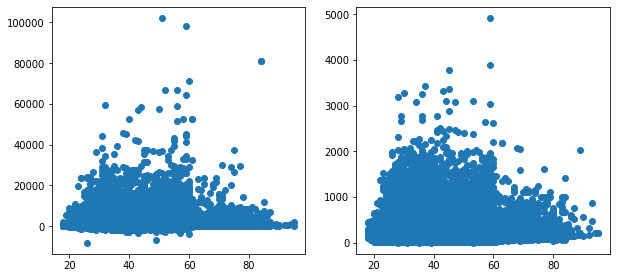

In [16]:
plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.scatter(df["age"],df["balance"])

plt.subplot(222)
plt.scatter(df["age"],df["duration"])


plt.show()

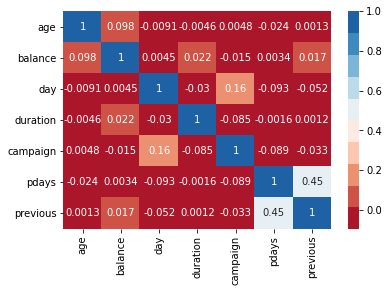

In [17]:
sns.heatmap(df.corr(), cmap=sns.color_palette("RdBu", 10), annot=True)

**Dimenstionality reduction**

**Unsupervised**

In [19]:
X = df.copy()

X = pd.get_dummies(X, drop_first=True)

In [20]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   job_blue-collar      45211 non-null  uint8
 8   job_entrepreneur     45211 non-null  uint8
 9   job_housemaid        45211 non-null  uint8
 10  job_management       45211 non-null  uint8
 11  job_retired          45211 non-null  uint8
 12  job_self-employed    45211 non-null  uint8
 13  job_services         45211 non-null  uint8
 14  job_student          45211 non-null  uint8
 15  job_technician       45211 non-null  uint8
 16  job_unemployed       4

In [21]:
X.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,5,261,1,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0


**K-Mean Clustering**

In [22]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

In [23]:
X1 = X[['age', 'balance']].copy()
X1.head()

,age,balance
0,58,2143
1,44,29
2,33,2
3,47,1506
4,33,1


[0 0 0 ... 1 0 0]


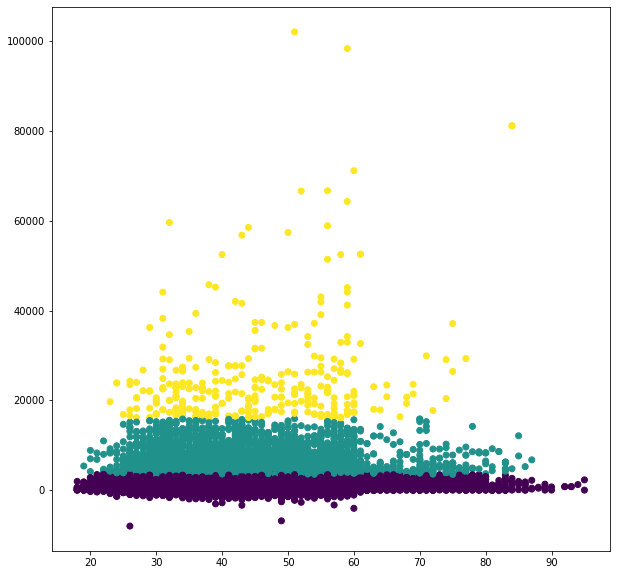

In [25]:
model = KMeans(n_clusters=3)
model.fit(X1)
all_predictions_1 = model.predict(X1)
print(all_predictions_1)
plt.figure(figsize=(10, 10))
plt.scatter(X["age"],X["balance"],c=all_predictions_1)
plt.show()

[3 0 0 ... 3 0 3]


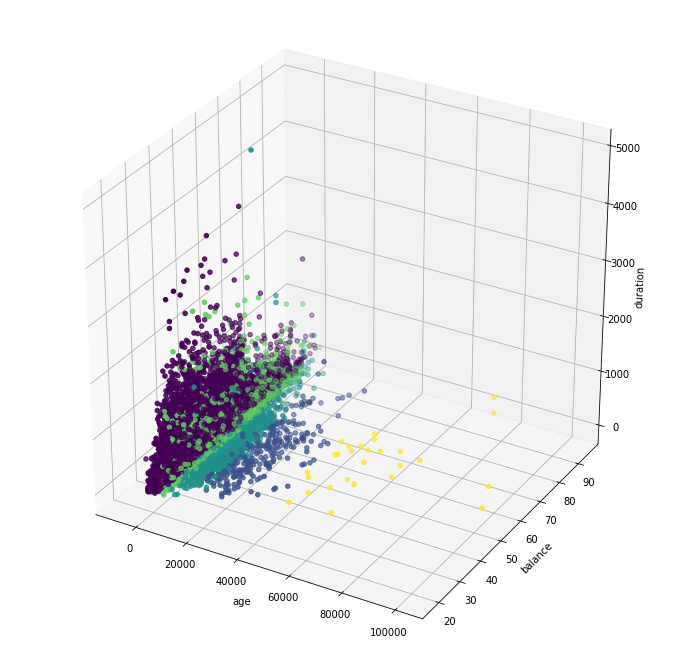

In [43]:
X3 = X[['age',"balance", 'duration']].copy()
model = KMeans(n_clusters=5)
model.fit(X3)
all_predictions_3 = model.predict(X3)
print(all_predictions_3)


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter( X["balance"],X["age"], X["duration"],c=all_predictions_3)

ax.set_xlabel('age')
ax.set_ylabel('balance')
ax.set_zlabel('duration')

plt.show()

[0 0 0 ... 2 0 0]


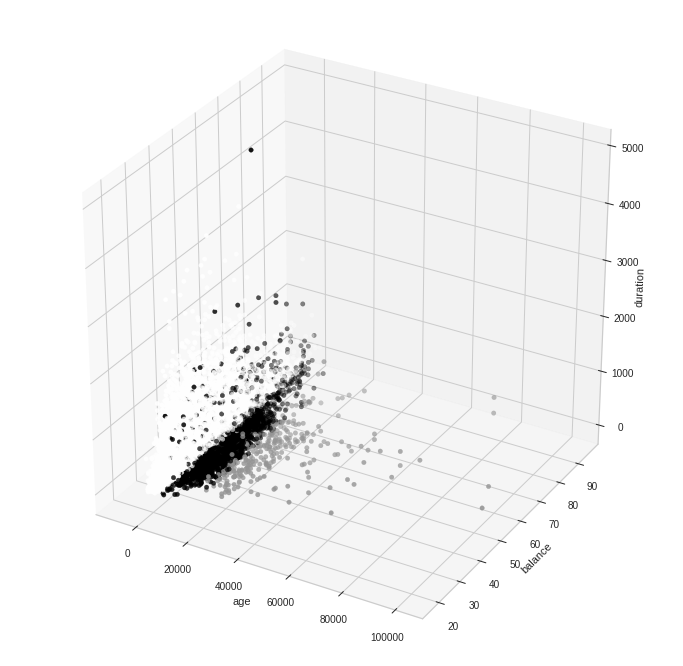

In [64]:
model = KMeans(n_clusters=3)

model.fit(X)
all_predictions = model.predict(X)
print(all_predictions)


fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')

ax.scatter( X["balance"],X["age"], X["duration"],c=all_predictions)

ax.set_xlabel('age')
ax.set_ylabel('balance')
ax.set_zlabel('duration')

plt.show()

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [40]:
X_std.shape

(45211, 43)

In [66]:
# model = KMeans(n_clusters=5)

# model.fit(X_std)
# all_predictions = model.predict(X_std)
# print(all_predictions)


# fig = plt.figure(figsize=(12,12))
# ax = fig.add_subplot(111, projection='3d')

# ax.scatter( X_std[1],X_std[0], X_std[3],c=all_predictions)

# ax.set_xlabel('age')
# ax.set_ylabel('balance')
# ax.set_zlabel('duration')

# plt.show()

AttributeError: ignored

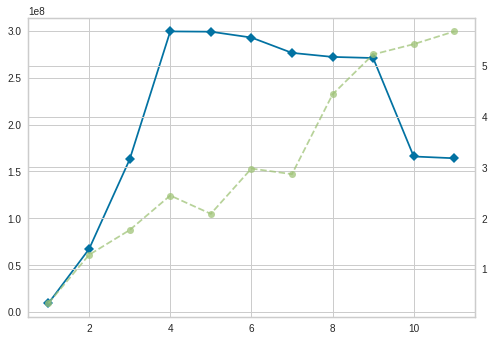

In [67]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

**Heirarchical Clustering**

In [47]:
import scipy.cluster.hierarchy as sch

In [59]:
x_sample = X.sample(50)

In [60]:
x_sample.describe()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
count,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.0,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.00000,50.000000,50.0,50.0,50.000000,50.0,50.000000,50.000000
mean,41.080000,1548.760000,16.760000,259.960000,3.34000,29.040000,0.34000,0.240000,0.020000,0.040000,0.240000,0.060000,0.020000,0.120000,0.020000,0.120000,0.080000,0.0,0.580000,0.320000,0.520000,0.260000,0.040000,0.0,0.580000,0.14000,0.100000,0.240000,0.200000,0.020000,0.060000,0.020000,0.14000,0.100000,0.020000,0.30000,0.120000,0.0,0.0,0.040000,0.0,0.840000,0.080000
std,11.893816,1785.370682,9.725959,262.050078,3.54913,75.250862,0.93917,0.431419,0.141421,0.197949,0.431419,0.239898,0.141421,0.328261,0.141421,0.328261,0.274048,0.0,0.498569,0.471212,0.504672,0.443087,0.197949,0.0,0.498569,0.35051,0.303046,0.431419,0.404061,0.141421,0.239898,0.141421,0.35051,0.303046,0.141421,0.46291,0.328261,0.0,0.0,0.197949,0.0,0.370328,0.274048
min,23.000000,-627.000000,1.000000,14.000000,1.00000,-1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000
25%,31.250000,325.500000,8.000000,97.250000,1.00000,-1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.000000
50%,40.000000,1133.000000,17.000000,174.000000,2.00000,-1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.000000
75%,50.500000,2036.750000,26.750000,285.500000,3.75000,-1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000,0.750000,0.000000,0.0,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.00000,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.000000
max,80.000000,9047.000000,31.000000,1389.000000,18.00000,290.000000,5.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000,0.0,0.0,1.000000,0.0,1.000000,1.000000


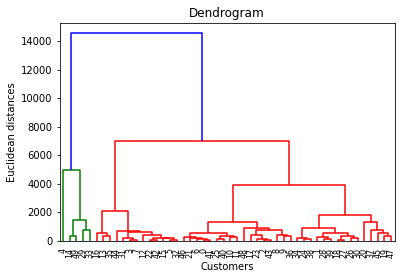

In [62]:
dendrogram = sch.dendrogram(sch.linkage(x_sample, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

**Regression**

**Classification**

**Deep Learning**

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
y = X["y_yes"]

x = X.copy()
del x["y_yes"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1131/1131 [==============================] - 2s 1ms/step - loss: 1.0585 - accuracy: 0.8702
Epoch 2/10
1131/1131 [==============================] - 2s 1ms/step - loss: 0.9564 - accuracy: 0.8723
Epoch 3/10
1131/1131 [==============================] - 2s 1ms/step - loss: 0.7939 - accuracy: 0.8746
Epoch 4/10
1131/1131 [==============================] - 2s 1ms/step - loss: 0.7728 - accuracy: 0.8778
Epoch 5/10
1131/1131 [==============================] - 2s 1ms/step - loss: 0.7548 - accuracy: 0.8793
Epoch 6/10
1131/1131 [==============================] - 2s 1ms/step - loss: 0.6909 - accuracy: 0.8800
Epoch 7/10
1131/1131 [==============================] - 2s 1ms/step - loss: 0.6409 - accuracy: 0.8784
Epoch 8/10
1131/1131 [==============================] - 2s 1ms/step - loss: 0.6811 - accuracy: 0.8759
Epoch 9/10
1131/1131 [==============================] - 2s 1ms/step - loss: 0.6445 - accuracy: 0.8789
Epoch 10/10
1131/1131 [==============================] - 2s 1ms/step - loss: 0.790

In [ ]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

283/283 - 0s - loss: 0.3159 - accuracy: 0.8947

Test accuracy: 0.8947252035140991
